### history
#### 训练集loss: loss
#### 测试集loss: val_loss
#### 训练集准确率: sparse_categorical_accuracy
#### 测试集准确率: val_sparse_categorical_accuracy

In [ ]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

### 例

In [1]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
np.set_printoptions(threshold=np.inf)

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [6]:
checkpoint_save_path = "./checkpoint/mnist.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

-------------load the model-----------------


In [7]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_test, y_test), validation_freq=1,
                    callbacks=[cp_callback])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1887 - sparse_categorical_accuracy: 0.9447 - val_loss: 0.1113 - val_sparse_categorical_accuracy: 0.9664
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0904 - sparse_categorical_accuracy: 0.9730 - val_loss: 0.0851 - val_sparse_categorical_accuracy: 0.9748
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0649 - sparse_categorical_accuracy: 0.9801 - val_loss: 0.0755 - val_sparse_categorical_accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0492 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.0691 - val_sparse_categorical_accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0384 - sparse_categorical_accuracy: 0.9880 - val_loss: 0.0763 - val_sparse_categorical_accuracy: 0.9776


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
print(model.trainable_variables)
file = open('./weights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

[<tf.Variable 'sequential/dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
array([[ 1.24140307e-02, -7.25495443e-02, -2.07427256e-02,
        -4.60632704e-02,  3.11086178e-02,  4.28360179e-02,
         2.02887356e-02, -4.37355004e-02, -7.90991560e-02,
        -4.72562015e-03,  4.84967604e-02,  7.78380111e-02,
        -5.43342009e-02,  8.05651024e-02, -6.65696040e-02,
         1.25601515e-02, -6.02646768e-02,  7.11592510e-02,
        -2.34205946e-02, -4.19636257e-02, -4.16257307e-02,
        -7.89874792e-02, -3.61243896e-02, -5.06201684e-02,
        -3.11607495e-02,  2.11157799e-02,  4.87875566e-02,
         4.22586128e-02, -1.89596377e-02, -5.78701496e-02,
        -5.44833206e-02,  7.94988796e-02,  4.09380943e-02,
         3.85706052e-02,  2.88102776e-02, -5.54554909e-03,
        -6.34160638e-03,  8.06180909e-02, -1.41788200e-02,
         2.02714726e-02, -5.15989959e-03, -4.84308191e-02,
         6.10418990e-02, -6.58230484e-02, -7.50791281e-02,
         6.07922301e-02,  5.329207

### ---------------------------------------------------------  show -------------------------------------------------------------

In [10]:
# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

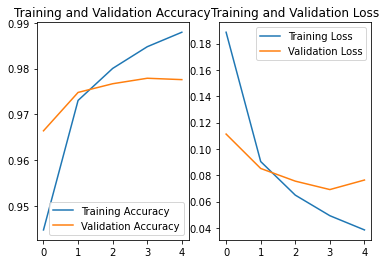

In [11]:
plt.subplot(1, 2, 1)  # 将图像分为一行两列,画出第一列
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()